# Regression problem

This type of analysis is used when you have continuous target variable. You have target variable so it's supervised. For example can be used to:
- Understand relationship between variables
- Forecast: predicting the sales in the future.
- Evaluating trends

Here we will talk about:
- implementation of linear regression
- outlier
- model evaluation and common problem
- how about non linear?

Categories:
- simple linear regression
- multiple linear regression

We learn the weight / gradient

## Gradient descent
What is the cost function of this problem?

$$J(w)=\frac{1}{2}\sum_{i=1}^{n}\left( y^{(i)}-\hat{y}^{(i)} \right)^2$$

where $\hat{y}^{(i)}$ is predicted value of point $i$. Using above cost function ($J(\pmb w)$), the gradient of that cost function with respect to weight ($w$) would be partial derivative as follows

$$\frac{\delta J}{\delta w_j}=-\sum_i \left( y^{(i)} - \hat{y}^{(i)}) \right)x_j^{(i)} $$

so the weight should be updated with

$$\Delta w_j=-\eta\frac{\delta J}{\delta w_j}=\eta \sum_i \left( y^{(i)} - \hat{y}^{(i)}) \right)x_j^{(i)} $$

So it really is the same as Adaline, but without unit step function. So we can also use gradient descent, or stochastic gradient descent. I forget again how to do gradient descet dudeeeee....

gradient descent steps:
- calculate $\Delta \pmb{w}$
- update weight $\pmb{w}:=\pmb{w}+\Delta \pmb{w}$

### Gradient descent implementation:
It's just the same as Adaline without step function at the `predict`.

In [16]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        return self.net_input(X)
    
    
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


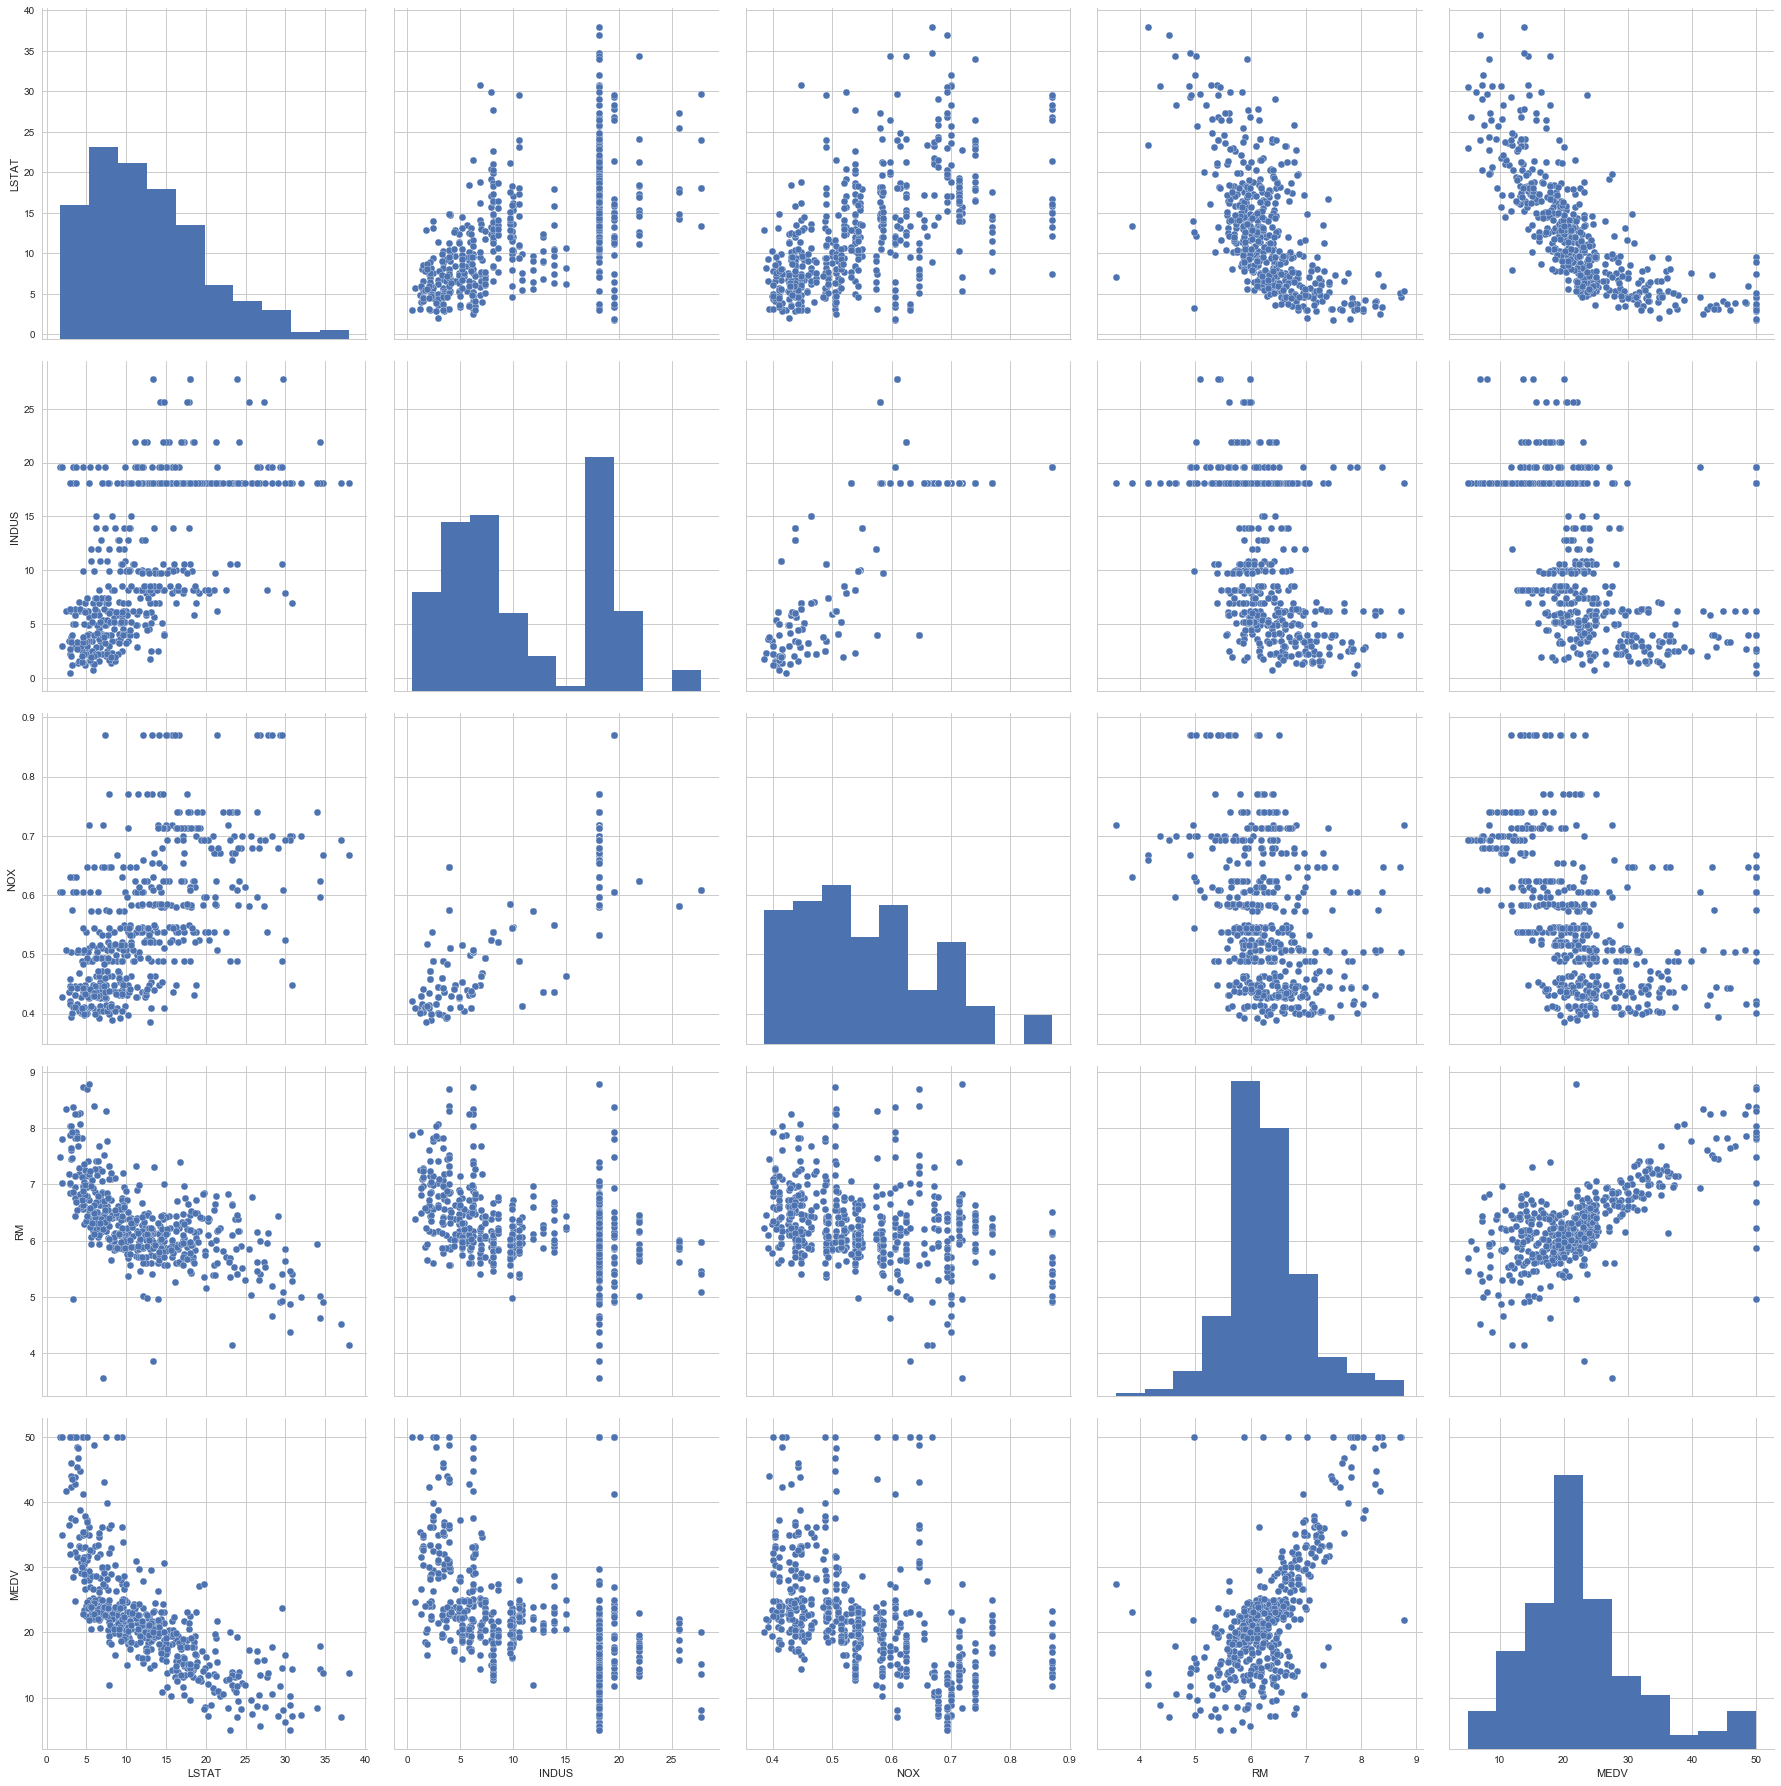

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=5)
plt.show()

To quantify the linear relationship between the features, we will now create a correlation matrix. A correlation matrix is closely related to the covariance matrix. It is a rescaled version of covariance matrix.

Correlation matrix is a square matrix (symmetric) that contains the **Pearson product-moment correlation coefficient (Pearson's r)**. Two features have a perfect positive correlation if $r=1$, no correlation $r=0$, and perfect positive correlation $r=-1$.

In the implementation, we can just use Numpy's `corrcoef`, and use seaborn's `heatmap`

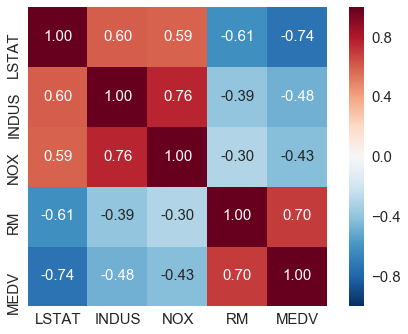

In [10]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True, 
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()

## Why do you make correlation matrix?
Of course to see the correlation between variables. But then what? This variable correlated with this one, then what's next?

That means, using the variable that linearly correlated with the target, we can just model it with linear regression dudeee...! This can be useful to make baseline model!

RM variable seems like a good choice

/home/bimo/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/bimo/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


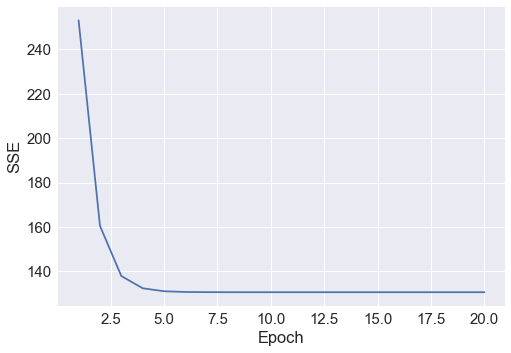

In [20]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

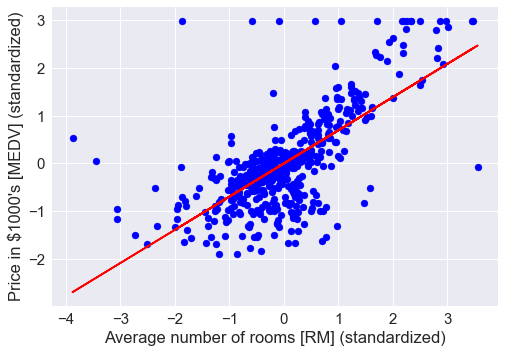

In [21]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

The graph above could explain why our model is good or bad. It explain how our model does not explain the house price very well in many cases.

Well, you should always do this plotting shits. If you work in a serius project. Because it's time consuming dude.

We were using scaling variable before. If wanna predict the with real valued variable tho, we gotta do this (`inverse_transform`)

In [22]:
num_rooms_std = sc_x.transform([5.0])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: {}".format(sc_y.inverse_transform(price_std)))

Price in $1000's: 10.839932888584524


/home/bimo/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


## Model evaluation
Will learn about:
- MSE
- $R^2$

Until now, we only know about SSE (sum square error) that we use to make model (objective / cost function to be minimize). Can that value be used to evaluate our model, especially on test set? No, intuitively SSE would get higher if we have more data right? Gotta use MSE (mean squared error).

$$MSE=\frac{1}{n}\sum_i^n \left( y^{(i)} - \hat{y}^{(i)} \right)^2$$

in sklearn, that would be in metrics called `mean_squared_error` or sometimes you use square root of MSE, it's called RMSE (root mean squared error)

$$ RMSE = \sqrt{MSE}$$

But sometimes the MSE value cannot be generalized when we talk about different dataset or different case (not like accuracy score). $R^2$ or the coefficient of determination, is a standardized version of MSE for better interpretability of the model performance.

$$R^2 = 1-\frac{SSE}{SST}$$

Or it simply the __variance of the response__

$$R^2=1-\frac{\frac{1}{n}\sum_i^n\left( y^{(i)}-\hat{y}^{(i)} \right)^2}{\frac{1}{n}\sum_i^n\left( y^{(i)} -\mu_y \right)^2}$$

In sklearn, you can call this metrics by import `r2_score` from metrics. What do you think the value of $R^2$ would be? for training set it would be bounded between 0 and 1, but it can become negative in the training set. 

## Overcome overfitting by regularization
Shrinking the parameter to induce penalty against complexity.

- Ridge Regression
- LASSO (Least absolute shrinkage and selection operator)
- Elastic Net

I have problem. I know that shrinking the weight to zero value can reduce the complexity by dimensional reduction. But how if it's just small (not zero). Doesn't it just makes the weight (gradient) smaller. How if the model is really better when the weight is bigger?

OK, i think, i can explain with this kind of point of view: bigger weight on a variable means that variable really affecting the target variable (the slope is high). Small change in that variable can affect a big move in the target. That is exactly the definition of complexity. If we force them to be small, it only affect a little.

## Ridge
L2 penalized model, just add square sum of the weight to the least-square cost function

$$J(w) = \sum_i^n \left( y^{(i)}-\hat{y}^{(i)} \right) + \lambda \sum_{j=1}^m w_j^2 $$

All variable are forced to shrink. In sklearn you can call it by Ridge from sklearn.linear_model module

## LASSO
Use L1 penalty

$$J(w) = \sum_i^n \left( y^{(i)}-\hat{y}^{(i)} \right) + \lambda \sum_{j=1}^m \lvert w_j \rvert $$

Using L1 penalty like this, depends on regularization strength $\lambda$ certain weight can become zero. So it can be useful as supervised feature selection. In sklearn just call Lasso

## Elastic net
Just a compromise between Ridge and LASSO, using both L1 to generate sparsity and L2 penalty to overcome the limitation of LASSO

$$J(w) = \sum_i^n \left( y^{(i)}-\hat{y}^{(i)} \right) + \lambda_1 \sum_{j=1}^m w_j^2 + \lambda_2 \sum_{j=1}^m \lvert w_j \rvert $$

in sklearn just call ElasticNet

# Polynomial regression

We can use this is we feel that the relationship between variableCan just use `sklearn.preprocessing import PolynomialFeatures` and transform the X to whatever degree that you want by specifiying it ex: `PolynomialFeatures(degree=2)`

But remember that this prone to overfit too. Using higher degree polynomial can increase complexity of the model.

# Regression for non-linear relationship using *Decision Tree* and *Random Forest*

I know how to use decision trees and random forest for classification problem. But they both can also be used in regression context.

Decision trees in the regression context can be understood as piece wise linear function in contrast to the global linear regression. Via decision tree, the input space are devided into smaller regions that become more manageable.

It doesn't require any feature transformation.

In classification problem, decision tree iteratively split the variable until the leaves pure. We define entropy or gini impurity. In regression context, the entropy or Gini is replaced with MSE. MSE need a prediction value, right? So how do you predict after doing split? It turns out just using the mean of the target within the subset after split.

$$ \hat{y}^{(i)}=\frac{1}{N} \sum_{i\in D_t}y^{(i)}$$

In the context of regression, the MSE is known as within-node variance. So the splitting criterion will actually doing variance reduction. __BUT__ I wonder about the splitting criterion. Each split is still splitting into two right? Well i think, it would choose the value for doing split with least MSE on both resulting subset.

In scikit-learn you can just call it using `from sklearn.tree import DecisionTreeRegressor`


Drawbacks:
- does not capture the continuity and differentiability of the desired prediction.

To better generalize the model, we can use Random Forest Regressor. As we already know, Random Forest is ensemble of decision trees.